# データを読み込む

Data 2024とData2025の全エクセルファイルをpandasに読み込み。

In [1]:
import pandas as pd
import glob
import os

# フォルダのリスト
folders = ["Data 2024", "Data 2025"]

# 年ごとに辞書を作成
dataframes_2024 = {}
dataframes_2025 = {}

# 各フォルダのファイルを取得し、辞書に格納
for folder, data_dict in zip(folders, [dataframes_2024, dataframes_2025]):
    file_paths = glob.glob(f"{folder}/*.xlsx")  # Excelファイルを取得

    for file in file_paths:
        file_name = os.path.splitext(os.path.basename(file))[0]  # 拡張子を除いたファイル名
        df = pd.read_excel(file)
        data_dict[file_name] = df  # 辞書に格納

# データ確認 (1vs1のデータを取得し、なければ空のDataFrame)
df_1vs1_2024 = dataframes_2024.get("1v1", pd.DataFrame())
df_1vs1_2025 = dataframes_2025.get("1v1", pd.DataFrame())

print("1v1 データ (Data2024):")
print(df_1vs1_2024.head())  # 空なら何も表示されない

1v1 データ (Data2024):
   Team            Total  Per 90 mins  % success  Unnamed: 4
0   NaN   League average       788.95      18.50       53.52
1  10.0              NaN       921.00      21.57       55.70
2   NaN     Cerezo Osaka          NaN        NaN         NaN
3  16.0              NaN       892.00      21.15       52.80
4   NaN  Albirex Niigata          NaN        NaN         NaN


ファイルのNaNなどの加工をする(若干ずれあるためいくつかのファイルはうまくいっていないがもう許容)

In [2]:
def remove_first_column(df):
    """
    すべての df から 1 列目を削除する（不要な順位データの削除）
    """
    df = df.copy()  # 元データを変更しないようにコピー
    
    df.columns = ["Team"] + df.columns[:-1].tolist()  # 1つ左に移動

    # 1列目を削除（カラム数が2以上の場合のみ）
    if df.shape[1] > 1:
        df = df.iloc[:, 1:].copy()
    
    # "Team"列以外の全ての列を取得（汎用的に）
    other_columns = df.columns.difference(["Team"])

    # `Team`列がNaNの行に対して、一つ下の行にデータを移動
    for idx in df[df["Team"].isna()].index:
        if idx < len(df) - 1:  # 最後の行を除外（下に移動できるデータがないため）
            df.loc[idx + 1, other_columns] = df.loc[idx, other_columns]

    # `Team` が NaN の行を削除
    df = df.dropna(subset=["Team"]).reset_index(drop=True)

    return df

# すべての df に対して 1 列目を削除
for data_dict in [dataframes_2024, dataframes_2025]:
    for key in data_dict.keys():
        data_dict[key] = remove_first_column(data_dict[key])


チーム名日本語変換

In [3]:
team_translation = {
    'Kashiwa Reysol': '柏',
    'Yokohama F. Marinos': '横浜FM',
    'Vissel Kobe': '神戸',
    'Sanfrecce Hiroshima': '広島',
    'Cerezo Osaka': 'C大阪',
    'Urawa Reds': '浦和',
    'Kawasaki Frontale': '川崎',
    'Albirex Niigata': '新潟',
    'Shimizu S-Pulse': '清水',
    'Machida Zelvia': '町田',
    'Kyoto Sanga': '京都',
    'Gamba Osaka': 'G大阪',
    'Tokyo': 'FC東京',
    'Tokyo Verdy': '東京V',
    'Nagoya Grampus': '名古屋',
    'Shonan Bellmare': '湘南',
    'Yokohama': '横浜FC',
    'Kashima Antlers': '鹿島',
    'Avispa Fukuoka': '福岡',
    'Fagiano Okayama': '岡山',
    'Júbilo Iwata': '磐田',
    'Consadole Sapporo': '札幌',
    'Sagan Tosu': '鳥栖',
    'League average': 'リーグ平均',
}

# teams カラムを日本語に変換
for key, df in dataframes_2024.items():
    df['Team'] = df['Team'].replace(team_translation)

for key, df in dataframes_2025.items():
    df['Team'] = df['Team'].replace(team_translation)

In [4]:
# 修正後のデータを表示
for key, df in dataframes_2024.items():
    print(f"\nData2024 - {key} (Final Fixed)")
    display(df.head())

for key, df in dataframes_2025.items():
    print(f"\nData2025 - {key} (Final Fixed)")
    display(df.head())


Data2024 - 1v1 (Final Fixed)


,Team,Total,Per 90 mins,% success
0,リーグ平均,788.95,18.50,53.52
1,C大阪,921.00,21.57,55.70
2,新潟,892.00,21.15,52.80
3,横浜FM,890.00,20.71,53.50
4,川崎,874.00,20.41,56.40



Data2024 - Aerial duels (Final Fixed)


,Team,Total,Per 90 mins,% success
0,リーグ平均,1715.2,40.21,45.36
1,神戸,2368.0,55.30,47.30
2,磐田,2155.0,49.83,43.90
3,町田,2086.0,48.89,47.00
4,京都,2023.0,46.64,42.10



Data2024 - Ball losses (Final Fixed)


,Team,Total,Per 90 mins
0,リーグ平均,4223.3,99.03
1,広島,4618.0,109.20
2,神戸,4465.0,104.27
3,京都,4447.0,102.52
4,福岡,4430.0,104.40



Data2024 - Ball possession (Final Fixed)


,Team,Ball possession
0,横浜FM,58.5
1,新潟,57.7
2,浦和,56.3
3,川崎,55.9
4,札幌,53.8



Data2024 - Challenge intensity (Final Fixed)


,Team,Challenge intensity
0,リーグ平均,5.69
1,湘南,6.40
2,京都,6.30
3,横浜FM,6.30
4,札幌,6.20



Data2024 - Conceded goals (Final Fixed)


,Unnamed: 0,Unnamed: 1,Team,Total,Per 90 mins,From head shots,From penalties,From free kick shots
0,League average,50.65,1.19,10.55,3.9,0.8,7.15,NaN
1,NaN,68.00,1.59,16.00,5,1,10.00,NaN
2,Sagan Tosu,NaN,1.57,NaN,NaN,NaN,NaN,NaN
3,Júbilo Iwata,NaN,1.55,NaN,NaN,NaN,NaN,NaN
4,Consadole Sapporo,NaN,1.44,NaN,NaN,NaN,NaN,NaN



Data2024 - Corners (Final Fixed)


,Team,Per 90 mins,Per 90 against
0,リーグ平均,4.48,4.48
1,磐田,3.86,5.50
2,横浜FM,5.14,4.89
3,浦和,4.59,4.50
4,鹿島,4.05,4.34



Data2024 - Cross (Final Fixed)


,Unnamed: 0,Team,Total,Per 90 mins,% accurate,From right flank,From left flank
0,League average,584.8,13.71,35.17,298.55,278.65,74.05
1,NaN,788.0,18.63,37.30,408.00,370.00,88.00
2,Sanfrecce Hiroshima,784.0,NaN,NaN,NaN,NaN,NaN
3,Vissel Kobe,648.0,NaN,NaN,NaN,NaN,NaN
4,Machida Zelvia,643.0,NaN,NaN,NaN,NaN,NaN



Data2024 - Defensive duels (Final Fixed)


,Unnamed: 0,Team,Total,Per 90 mins
0,League average,2325.0,54.52,61.62
1,NaN,2552.0,60.02,62.40
2,Shonan Bellmare,2531.0,NaN,NaN
3,Avispa Fukuoka,2511.0,NaN,NaN
4,Sanfrecce Hiroshima,2478.0,NaN,NaN



Data2024 - Fouls suffered (Final Fixed)


,Team,Total,Per 90 mins
0,リーグ平均,424.35,9.95
1,磐田,417.00,9.64
2,横浜FM,457.00,10.64
3,浦和,429.00,10.16
4,鹿島,497.00,11.77



Data2024 - Fouls (Final Fixed)


,Team,Total,Per 90 mins
0,リーグ平均,453.25,10.63
1,福岡,545.00,12.84
2,町田,538.00,12.61
3,湘南,535.00,12.58
4,京都,507.00,11.69



Data2024 - Goals (Final Fixed)


,Unnamed: 0,Team,Total,Per 90 mins,Head,Right foot,Left foot,From corners,From free kick shots,From penalties
0,League average,50.65,1.19,10.55,24.45,14.2,7.2,0.8,3.9,7.05
1,NaN,72.00,1.70,18.00,38.00,15.0,12.0,2,6.0,14.00
2,Sanfrecce Hiroshima,66.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Kawasaki Frontale,61.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Vissel Kobe,61.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Data2024 - Interceptions (Final Fixed)


,Team,Total,Per 90 mins
0,リーグ平均,1518.45,35.60
1,京都,1661.00,38.29
2,磐田,1653.00,38.22
3,福岡,1621.00,38.20
4,FC東京,1617.00,37.80



Data2024 - Key passes (Final Fixed)


,Team,Total,Per 90 mins
0,リーグ平均,116.8,2.74
1,広島,176.0,4.16
2,柏,164.0,3.84
3,神戸,148.0,3.46
4,横浜FM,147.0,3.42



Data2024 - Long passes (Final Fixed)


,Team,Total,Per 90 mins,% accurate
0,リーグ平均,1801.45,42.25,52.03
1,札幌,2212.00,51.95,53.50
2,神戸,2070.00,48.34,60.40
3,広島,2009.00,47.51,51.70
4,C大阪,1907.00,44.66,50.10



Data2024 - Offside (Final Fixed)


,Team,Total,Per 90 mins
0,リーグ平均,62.75,1.47
1,横浜FM,92.00,2.14
2,鹿島,91.00,2.16
3,町田,83.00,1.95
4,広島,74.00,1.75



Data2024 - Passes (Final Fixed)


,Team,Total,Per 90 mins,% accurate
0,リーグ平均,15643.0,367.00,81.59
1,新潟,21457.0,508.73,87.80
2,横浜FM,19957.0,464.48,85.90
3,浦和,19542.0,462.84,85.80
4,川崎,18855.0,440.31,85.60



Data2024 - Passing rate (Final Fixed)


,Team,Passing rate
0,リーグ平均,14.01
1,新潟,16.20
2,横浜FM,15.90
3,川崎,15.60
4,浦和,14.90



Data2024 - PPDA against (Final Fixed)


,Team,PPDA Against
0,リーグ平均,11.11
1,新潟,14.98
2,浦和,14.19
3,鳥栖,13.66
4,横浜FM,12.74



Data2024 - PPDA (Final Fixed)


,Team,PPDA
0,リーグ平均,11.12
1,東京V,13.54
2,磐田,13.01
3,新潟,12.66
4,名古屋,12.58



Data2024 - Progressive passes (Final Fixed)


,Team,Total,Per 90 mins,% accuracy
0,リーグ平均,2749.95,64.50,71.71
1,磐田,2572.00,59.48,66.50
2,横浜FM,3071.00,71.47,73.80
3,浦和,2776.00,65.75,71.00
4,鹿島,2858.00,67.71,73.10



Data2024 - Progressive runs (Final Fixed)


,Team,Total,Per 90 mins
0,リーグ平均,433.85,10.18
1,磐田,317.00,7.33
2,横浜FM,524.00,12.20
3,浦和,524.00,12.41
4,鹿島,444.00,10.52



Data2024 - Shots against (Final Fixed)


,Team,Shots against,Per 90 mins
0,リーグ平均,458.05,10.73
1,鳥栖,565.00,13.19
2,横浜FM,560.00,13.03
3,磐田,535.00,12.37
4,京都,529.00,12.20



Data2024 - Shots blocked (Final Fixed)


,Team,Total,Per 90 mins,Percentage of blocked shots,Percentage of blocked shots against
0,リーグ平均,127.5,2.99,27.63,27.66
1,磐田,160.0,3.70,28.80,30.10
2,横浜FM,148.0,3.44,26.30,27.00
3,浦和,118.0,2.79,29.00,25.90
4,鹿島,109.0,2.58,29.00,26.30



Data2024 - Shots (Final Fixed)


,Unnamed: 0,Team,Total,Per 90 mins,% on target,Head,On posts,Outside penalty area
0,League average,458.05,10.74,34.32,73.75,9.75,187.8,437.9
1,NaN,643.00,15.20,33.30,120.00,16.00,260.0,617.0
2,Sanfrecce Hiroshima,537.00,NaN,NaN,NaN,NaN,NaN,NaN
3,Yokohama F. Marinos,515.00,NaN,NaN,NaN,NaN,NaN,NaN
4,Kawasaki Frontale,496.00,NaN,NaN,NaN,NaN,NaN,NaN



Data2024 - Smart passes (Final Fixed)


,Team,Total,Per 90 mins,% accuracy
0,リーグ平均,69.2,1.62,44.22
1,磐田,32.0,0.74,21.90
2,横浜FM,101.0,2.35,45.50
3,浦和,94.0,2.23,39.40
4,鹿島,69.0,1.63,47.80



Data2024 - Through passes (Final Fixed)


,Team,Total,Per 90 mins,% accurate
0,リーグ平均,194.3,4.56,34.23
1,札幌,246.0,5.78,32.90
2,浦和,239.0,5.66,36.00
3,横浜FM,233.0,5.42,36.10
4,鹿島,219.0,5.19,31.10



Data2024 - To final third (Final Fixed)


,Team,Total,Per 90 mins,% accurate
0,リーグ平均,2066.2,48.46,66.68
1,横浜FM,2472.0,57.53,72.90
2,広島,2330.0,55.10,65.40
3,札幌,2315.0,54.37,65.50
4,C大阪,2258.0,52.88,65.80



Data2024 - Touch in penalty area (Final Fixed)


,Team,Total,Per 90 mins
0,リーグ平均,696.75,16.34
1,磐田,568.00,13.13
2,横浜FM,817.00,19.01
3,浦和,704.00,16.67
4,鹿島,722.00,17.10



Data2024 - xG against (Final Fixed)


,Team,xGA,Goals conceded,xG per shot against
0,リーグ平均,53.09,50.65,0.120
1,磐田,73.24,68.00,0.137
2,鳥栖,71.09,68.00,0.126
3,札幌,68.10,66.00,0.136
4,京都,63.11,55.00,0.119



Data2024 - xG (Final Fixed)


,Team,xG,Goals,xG per shot
0,リーグ平均,53.09,50.65,0.120
1,広島,75.12,72.00,0.117
2,川崎,68.43,66.00,0.133
3,横浜FM,67.69,61.00,0.126
4,神戸,62.43,61.00,0.127



Data2025 - 1v1 (Final Fixed)


,Team,Total,Per 90 mins,% success
0,リーグ平均,85.85,16.14,51.18
1,鹿島,120.00,21.77,55.80
2,清水,117.00,21.02,51.30
3,柏,108.00,19.88,50.00
4,横浜FC,99.00,18.15,48.50



Data2025 - Aerial duels (Final Fixed)


,Team,Total,Per 90 mins,% success
0,リーグ平均,233.8,44.06,45.84
1,京都,372.0,65.26,41.10
2,神戸,341.0,75.41,48.10
3,町田,324.0,59.15,49.70
4,東京V,294.0,53.13,46.90



Data2025 - Ball losses (Final Fixed)


,Unnamed: 0,Team,Total
0,League average,602.0,113.21
1,NaN,732.0,128.42
2,Kyoto Sanga,685.0,NaN
3,Fagiano Okayama,658.0,NaN
4,Gamba Osaka,654.0,NaN



Data2025 - Ball possession (Final Fixed)


,Team,Ball possession
0,柏,60.7
1,横浜FM,57.1
2,神戸,55.6
3,広島,53.6
4,C大阪,52.9



Data2025 - Challenge intensity (Final Fixed)


,Unnamed: 0,Team
0,League average,5.71
1,NaN,5.20
2,Yokohama F. Marinos,5.80
3,Yokohama,7.50
4,Vissel Kobe,5.60



Data2025 - Conceded goals (Final Fixed)


,Team,Total,Per 90 mins,From head shots,From penalties,From free kick shots,From outside area
0,リーグ平均,5.1,0.95,1.1,0.25,0.05,0.4
1,名古屋,12.0,2.11,1,-,-,-
2,C大阪,9.0,1.62,2,-,-,1
3,新潟,9.0,1.65,2,1,-,1
4,東京V,8.0,1.45,3,1,-,-



Data2025 - Corners (Final Fixed)


,Team,Per 90 mins,Per 90 against
0,リーグ平均,4.32,4.30
1,横浜FM,2.07,3.68
2,浦和,5.08,4.72
3,鹿島,5.99,4.90
4,名古屋,3.33,4.56



Data2025 - Cross (Final Fixed)


,Unnamed: 0,Team,Total,Per 90 mins,% accurate,From right flank,From left flank
0,League average,68.8,13.03,32.93,36.5,31.2,9.25
1,NaN,94.0,17.06,31.90,52.0,38.0,12.00
2,Urawa Reds,82.0,NaN,NaN,NaN,NaN,NaN
3,Fagiano Okayama,78.0,NaN,NaN,NaN,NaN,NaN
4,Sanfrecce Hiroshima,78.0,NaN,NaN,NaN,NaN,NaN



Data2025 - Defensive duels (Final Fixed)


,Team,Total,Per 90 mins,% success
0,リーグ平均,310.25,58.14,66.04
1,東京V,376.00,67.95,66.20
2,京都,364.00,63.86,65.10
3,G大阪,364.00,64.62,69.50
4,湘南,363.00,67.36,65.60



Data2025 - Fouls suffered (Final Fixed)


,Team,Total,Per 90 mins
0,リーグ平均,48.85,9.33
1,横浜FM,56.00,12.89
2,浦和,42.00,7.62
3,鹿島,62.00,11.25
4,名古屋,49.00,8.60



Data2025 - Fouls (Final Fixed)


,Unnamed: 0,Team,Total
0,League average,52.2,9.8
1,NaN,43.0,9.9
2,Yokohama F. Marinos,51.0,NaN
3,Yokohama,39.0,NaN
4,Vissel Kobe,44.0,NaN



Data2025 - Goals (Final Fixed)


,Team,Total,Per 90 mins,Head,Right foot,Left foot,From corners,From free kick shots,From penalties,Outside penalty area
0,リーグ平均,5.1,0.96,1.1,2.45,1.35,0.5,0.05,0.25,0.4
1,鹿島,11.0,2.00,2,7,1,-,-,2,-
2,C大阪,10.0,1.80,3,5,2,-,-,-,1
3,川崎,7.0,1.58,4,2,1,-,-,-,-
4,柏,7.0,1.29,3,3,1,-,-,-,1



Data2025 - Interceptions (Final Fixed)


,Team,Total,Per 90 mins
0,リーグ平均,196.2,36.74
1,湘南,239.0,44.35
2,C大阪,238.0,42.75
3,横浜FC,229.0,41.98
4,G大阪,228.0,40.47



Data2025 - Key passes (Final Fixed)


,Team,Total,Per 90 mins
0,リーグ平均,11.75,2.20
1,柏,21.00,3.87
2,C大阪,20.00,3.59
3,湘南,16.00,2.97
4,岡山,15.00,2.72



Data2025 - Long passes (Final Fixed)


,Team,Total,Per 90 mins,% accurate
0,リーグ平均,248.15,46.82,51.65
1,京都,293.00,51.40,47.10
2,東京V,290.00,52.41,50.70
3,横浜FC,285.00,52.24,54.70
4,町田,284.00,51.85,54.60



Data2025 - Offside (Final Fixed)


,Team,Total,Per 90 mins
0,リーグ平均,7.4,1.41
1,神戸,16.0,3.54
2,川崎,13.0,2.93
3,岡山,12.0,2.18
4,湘南,12.0,2.23



Data2025 - Passes (Final Fixed)


,Team,Total,Per 90 mins,% accurate
0,リーグ平均,2104.25,397.62,80.79
1,柏,3110.00,572.39,86.80
2,C大阪,2620.00,470.66,85.00
3,清水,2485.00,446.41,82.10
4,新潟,2436.00,446.52,83.60



Data2025 - Passing rate (Final Fixed)


,Team,Passing rate
0,リーグ平均,14.2
1,柏,16.5
2,C大阪,16.3
3,清水,15.8
4,川崎,15.5



Data2025 - PPDA against (Final Fixed)


,Team,PPDA Against
0,リーグ平均,11.21
1,柏,16.21
2,広島,15.96
3,C大阪,14.99
4,湘南,12.82



Data2025 - PPDA (Final Fixed)


,Team,PPDA
0,リーグ平均,11.19
1,横浜FM,14.05
2,横浜FC,13.18
3,神戸,6.79
4,浦和,12.42



Data2025 - Progressive passes (Final Fixed)


,Team,Total,Per 90 mins,% accuracy
0,リーグ平均,366.45,69.16,67.97
1,横浜FM,318.00,73.20,72.60
2,浦和,400.00,72.58,66.00
3,鹿島,360.00,65.32,69.40
4,名古屋,365.00,64.04,69.30



Data2025 - Progressive runs (Final Fixed)


,Team,Total,Per 90 mins
0,リーグ平均,54.8,10.34
1,横浜FM,56.0,12.89
2,浦和,61.0,11.07
3,鹿島,43.0,7.80
4,名古屋,32.0,5.61



Data2025 - Shot (Final Fixed)


,Unnamed: 0,Unnamed: 1,Team,Total,Per 90 mins,% on target,Head,On posts,Outside penalty area
0,League average,49.75,9.36,34.06,8.35,1.05,20.4,48.3,NaN
1,NaN,66.00,11.86,34.80,14.00,1,19.0,66.0,NaN
2,Cerezo Osaka,NaN,11.36,NaN,NaN,NaN,NaN,NaN,NaN
3,Gamba Osaka,NaN,11.07,NaN,NaN,NaN,NaN,NaN,NaN
4,Kashima Antlers,NaN,10.76,NaN,NaN,NaN,NaN,NaN,NaN



Data2025 - Shots against (Final Fixed)


,Team,Shots against,Per 90 mins
0,リーグ平均,49.75,9.31
1,C大阪,70.00,12.57
2,名古屋,68.00,11.93
3,京都,65.00,11.40
4,G大阪,60.00,10.65



Data2025 - Shots blocked (Final Fixed)


,Unnamed: 0,Team,Total,Per 90 mins,Percentage of blocked shots
0,League average,14.2,2.66,28.61,28.52
1,NaN,8.0,1.84,42.40,18.90
2,Yokohama F. Marinos,12.0,NaN,NaN,NaN
3,Urawa Reds,16.0,NaN,NaN,NaN
4,Kashima Antlers,21.0,NaN,NaN,NaN



Data2025 - Smart passes (Final Fixed)


,Team,Total,Per 90 mins,% accuracy
0,リーグ平均,5.55,1.05,32.64
1,横浜FM,1,0.23,0.00
2,浦和,9,1.63,55.60
3,鹿島,3,0.54,33.30
4,名古屋,5,0.88,20.00



Data2025 - Through passes (Final Fixed)


,Team,Total,Per 90 mins,% accurate
0,リーグ平均,21.55,4.10,33.65
1,新潟,40.00,7.33,22.50
2,神戸,37.00,8.18,45.90
3,東京V,32.00,5.78,34.40
4,湘南,31.00,5.75,38.70



Data2025 - To final third (Final Fixed)


,Team,Total,Per 90 mins,% accurate
0,リーグ平均,271.05,51.23,65.04
1,C大阪,320.00,57.49,68.80
2,柏,301.00,55.40,74.80
3,町田,300.00,54.77,63.30
4,湘南,298.00,55.30,64.80



Data2025 - Touch in Penalty area (Final Fixed)


,Team,Total,Per 90 mins
0,リーグ平均,76.8,14.45
1,横浜FM,48.0,11.05
2,浦和,100.0,18.15
3,鹿島,92.0,16.69
4,名古屋,74.0,12.98



Data2025 - xG against (Final Fixed)


,Team,xGA,Goals conceded,xG per shot against
0,リーグ平均,5.69,5.1,0.110
1,名古屋,9.81,12.0,0.144
2,C大阪,9.08,9.0,0.130
3,京都,6.93,5.0,0.107
4,鹿島,6.34,3.0,0.122



Data2025 - xG (Final Fixed)


,Team,xG,Goals,xG per shot
0,リーグ平均,5.69,5.1,0.120
1,湘南,8.26,6.0,0.153
2,C大阪,7.42,10.0,0.112
3,新潟,7.21,6.0,0.129
4,鹿島,6.71,11.0,0.110


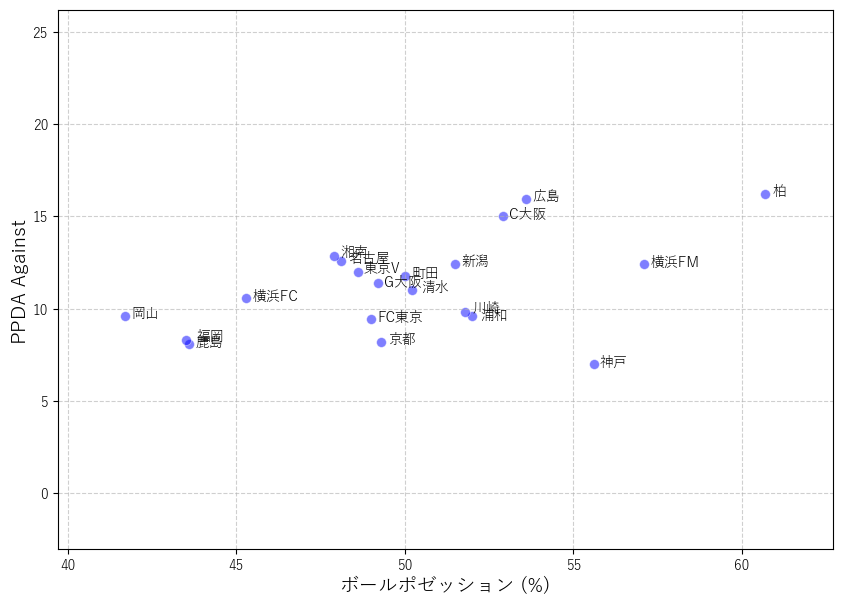

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text
import pandas as pd

# 日本語フォントの設定
plt.rcParams['font.family'] = 'Yu Gothic'

# データ確認 (1vs1のデータを取得し、なければ空のDataFrame)
df_ball_possession = dataframes_2025.get("Ball possession", pd.DataFrame())
df_long_passes = dataframes_2025.get("PPDA against", pd.DataFrame())

# データの結合
df_merged = df_ball_possession.merge(df_long_passes, on="Team", how="inner")

# グラフの描画
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_merged, x="Ball possession", y="PPDA Against", color='blue', alpha=0.5, s=50)

# ラベルの追加
texts = []
for i, txt in enumerate(df_merged["Team"]):
    text = plt.annotate(txt, 
                        (df_merged["Ball possession"].iloc[i] +0.2, df_merged["PPDA Against"].iloc[i] + 0.2), 
                        fontsize=10, ha="left", va="top")
    texts.append(text)

# 自動的にラベルの位置を調整
adjust_text(texts)

# 軸ラベルとタイトルの設定
plt.xlabel("ボールポゼッション (%)", fontsize=14)
plt.ylabel("PPDA Against", fontsize=14)
# plt.title("タイトル", fontsize=14, fontweight='bold')

# グリッドを見やすく
plt.grid(True, linestyle="--", alpha=0.6)

# 軸の範囲調整（余白を適度に取る）
plt.xlim(df_merged["Ball possession"].min() - 2, df_merged["Ball possession"].max() + 2)
plt.ylim(df_merged["PPDA Against"].min() - 10, df_merged["PPDA Against"].max() + 10)

# 描画
plt.show()


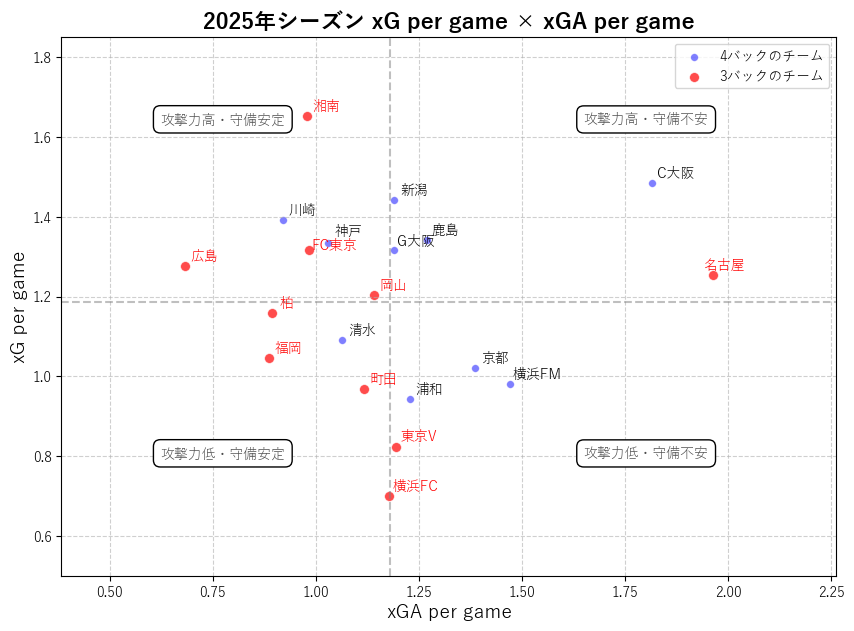

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text
import pandas as pd

# 日本語フォントの設定
plt.rcParams['font.family'] = 'Yu Gothic'

# 特定のチーム
highlight_teams = ["町田", "広島", "東京V", "FC東京", "名古屋", "福岡", "湘南", "柏", "岡山", "横浜FC"]
special_teams = ["広島", "神戸", "川崎", "横浜FM"]  # 4で割るチーム

# データ確認 (1vs1のデータを取得し、なければ空のDataFrame)
df_x = dataframes_2025.get("xG", pd.DataFrame())
df_y = dataframes_2025.get("xG against", pd.DataFrame())

# データの結合
df_merged = df_x.merge(df_y, on="Team", how="inner")
# "リーグ平均" の行を削除
df_merged = df_merged[df_merged["Team"] != "リーグ平均"]

# xG per game と xGA per game の計算
df_merged["xG per game"] = df_merged.apply(lambda row: row[" xG"] / 4 if row["Team"] in special_teams else row[" xG"] / 5, axis=1)
df_merged["xGA per game"] = df_merged.apply(lambda row: row["xGA"] / 4 if row["Team"] in special_teams else row["xGA"] / 5, axis=1)

# 図の設定
plt.figure(figsize=(10, 7))

# 通常のチーム（青）
df_normal = df_merged[~df_merged["Team"].isin(highlight_teams)]
sns.scatterplot(data=df_normal, x="xGA per game", y="xG per game", color='blue', alpha=0.5, s=30, label="4バックのチーム")

# ハイライトチーム（赤）
df_highlight = df_merged[df_merged["Team"].isin(highlight_teams)]
sns.scatterplot(data=df_highlight, x="xGA per game", y="xG per game", color='red', alpha=0.7, s=50, label="3バックのチーム")

texts = []
for i, row in df_merged.iterrows():
    color = "red" if row["Team"] in highlight_teams else "black"  # ハイライトチームは赤
    text = plt.annotate(row["Team"], 
                        (row["xGA per game"] + 0.02, row["xG per game"] + 0.04), 
                        fontsize=10, ha="left", va="top", color=color)
    texts.append(text)

# 自動的にラベルの位置を調整
adjust_text(texts)

# 軸ラベルとタイトル
plt.xlabel("xGA per game", fontsize=14)
plt.ylabel("xG per game", fontsize=14)

# グリッドを見やすく
plt.grid(True, linestyle="--", alpha=0.6)

# 軸の範囲調整
plt.xlim(df_merged["xGA per game"].min() - 0.3, df_merged["xGA per game"].max() + 0.3)
plt.ylim(df_merged["xG per game"].min() - 0.2, df_merged["xG per game"].max() + 0.2)


# 平均線を追加
plt.axhline(y=df_merged["xG per game"].mean(), color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=df_merged["xGA per game"].mean(), color='gray', linestyle='--', alpha=0.5)

plt.title("2025年シーズン xG per game × xGA per game", fontsize=16, fontweight='bold')
# 凡例を追加
plt.legend()

# 象限ラベルを追加
x_min, x_max = df_merged["xGA per game"].min(), df_merged["xGA per game"].max()
y_min, y_max = df_merged["xG per game"].min(), df_merged["xG per game"].max()

plt.text(x_max - 0.01, y_max - (y_max - y_min) * 0.02, 
         "攻撃力高・守備不安", ha="right", fontsize=10, alpha=0.7,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.text(x_min - 0.06, y_max - (y_max - y_min) * 0.02, 
         "攻撃力高・守備安定", fontsize=10, alpha=0.7,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.text(x_max - 0.01, y_min + (y_max - y_min) * 0.1, 
         "攻撃力低・守備不安", ha="right", fontsize=10, alpha=0.7,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.text(x_min - 0.06, y_min + (y_max - y_min) * 0.1, 
         "攻撃力低・守備安定", fontsize=10, alpha=0.7,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
# 描画
plt.show()


# PPDA × ポゼッション

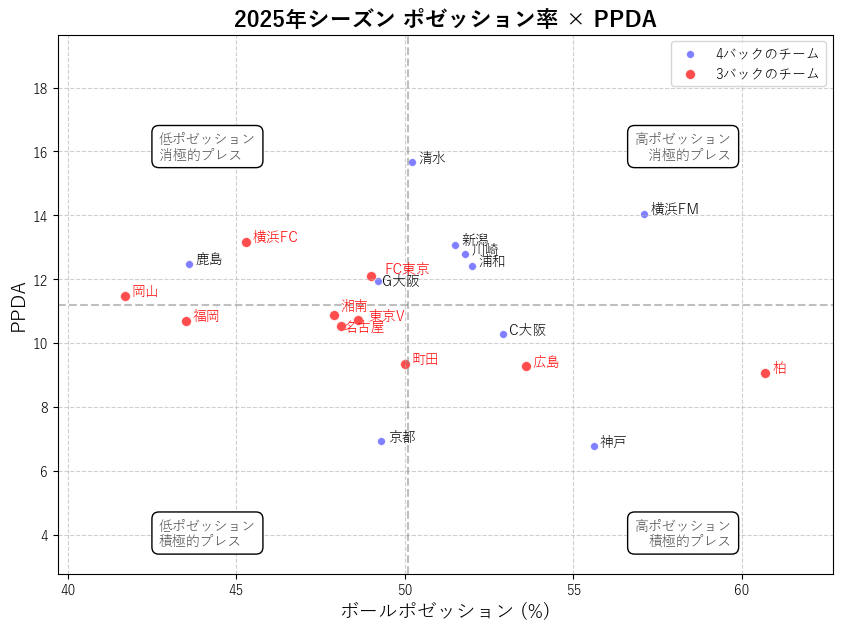

In [7]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from adjustText import adjust_text

# 日本語フォントの設定
plt.rcParams['font.family'] = 'Yu Gothic'

# 特定のチーム
highlight_teams = ["町田", "広島", "東京V", "FC東京", "名古屋", "福岡", "湘南", "柏", "岡山", "横浜FC"]
#highlight_teams = ["広島","名古屋", "湘南", "札幌"]

# データ確認 (1vs1のデータを取得し、なければ空のDataFrame)
df_x = dataframes_2025.get("Ball possession", pd.DataFrame())
df_y = dataframes_2025.get("PPDA", pd.DataFrame())

# データの結合
df_merged = df_x.merge(df_y, on="Team", how="inner")

# 図の設定
plt.figure(figsize=(10, 7))

# 通常のチーム（青）
df_normal = df_merged[~df_merged["Team"].isin(highlight_teams)]
sns.scatterplot(data=df_normal, x="Ball possession", y="PPDA", color='blue', alpha=0.5, s=30, label="4バックのチーム")

# ハイライトチーム（赤）
df_highlight = df_merged[df_merged["Team"].isin(highlight_teams)]
sns.scatterplot(data=df_highlight, x="Ball possession", y="PPDA", color='red', alpha=0.7, s=50, label="3バックのチーム")

texts = []
for i, row in df_merged.iterrows():
    color = "red" if row["Team"] in highlight_teams else "black"  # ハイライトチームは赤
    text = plt.annotate(row["Team"], 
                        (row["Ball possession"] + 0.2, row["PPDA"]+ 0.2), 
                        fontsize=10, ha="left", va="top", color=color)
    texts.append(text)

# 自動的にラベルの位置を調整
adjust_text(texts)

# 軸ラベルとタイトル
plt.xlabel("ボールポゼッション (%)", fontsize=14)
plt.ylabel("PPDA", fontsize=14)


# グリッドを見やすく
plt.grid(True, linestyle="--", alpha=0.6)

# 軸の範囲調整
plt.xlim(df_merged["Ball possession"].min() - 2, df_merged["Ball possession"].max() + 2)
plt.ylim(df_merged["PPDA"].min() - 4, df_merged["PPDA"].max() + 4)

# 平均線を追加
plt.axhline(y=df_merged["PPDA"].mean(), color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=df_merged["Ball possession"].mean(), color='gray', linestyle='--', alpha=0.5)


# 象限ラベルを追加
x_min, x_max = df_merged["Ball possession"].min(), df_merged["Ball possession"].max()
y_min, y_max = df_merged["PPDA"].min(), df_merged["PPDA"].max()
x_mean = df_merged["Ball possession"].mean()
y_mean = df_merged["PPDA"].mean()

plt.text(x_max - 1, y_min + (y_max - y_min) * 0.1 - 4, 
         "高ポゼッション\n積極的プレス", ha="right", fontsize=10, alpha=0.7,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.text(x_min + 1, y_min + (y_max - y_min) * 0.1 - 4, 
         "低ポゼッション\n積極的プレス", fontsize=10, alpha=0.7,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.text(x_max - 1, y_max - (y_max - y_min) * 0.1 + 1, 
         "高ポゼッション\n消極的プレス", ha="right", fontsize=10, alpha=0.7,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.text(x_min + 1, y_max - (y_max - y_min) * 0.1 + 1, 
         "低ポゼッション\n消極的プレス", fontsize=10, alpha=0.7,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.title("2025年シーズン ポゼッション率 × PPDA", fontsize=16, fontweight='bold')
# 凡例を追加
plt.legend()

# 描画
plt.show()

C:\Users\arita\AppData\Local\Temp\ipykernel_16224\3027507703.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top5, y="Team", x="Per 90 mins", palette="Blues_r", edgecolor="black",


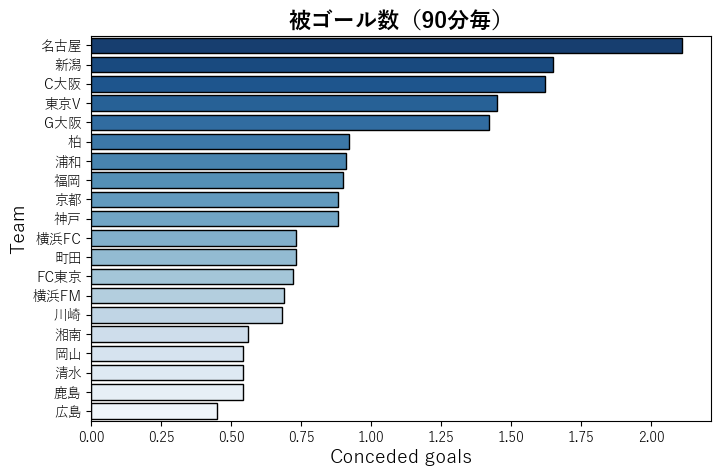

In [11]:
import seaborn as sns

df_top5 = dataframes_2025.get("Conceded goals", pd.DataFrame())
df_top5 = df_top5[df_top5["Team"] != "リーグ平均"]
plt.figure(figsize=(8, 5))
sns.barplot(data=df_top5, y="Team", x="Per 90 mins", palette="Blues_r", edgecolor="black",
            order=df_top5.sort_values("Per 90 mins", ascending=False)["Team"])

# 値を表示
# for i, v in enumerate(df_top5["Per 90 mins"]):
#     if i == 10:
#         plt.text(v , i, f"{v:.2f}", va="center", fontsize=12)
    
plt.xlabel("Conceded goals", fontsize=14)
plt.ylabel("Team", fontsize=14)
plt.title("被ゴール数（90分毎）", fontsize=16, fontweight="bold")

plt.show()

In [23]:
metrics = ['PPDA', 'Interceptions',  'Ball possession']
for metric in metrics:
    df_tmp = dataframes_2024.get(metric, pd.DataFrame())
    df_tmp = df_tmp[df_tmp["Team"] == "リーグ平均"]
    print(df_tmp)

    Team   PPDA
0  リーグ平均  11.12
    Team    Total  Per 90 mins
0  リーグ平均  1518.45         35.6
Empty DataFrame
Columns: [Team, Ball possession]
Index: []


C:\Users\arita\AppData\Local\Temp\ipykernel_16224\3473849777.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='指標', y='変化率(%)', data=df, palette=colors)


                指標  2024年  2025年  変化率(%)
0             PPDA  11.12  11.19    0.63
1    Interceptions  35.60  36.74    3.20
2  Defensive duels  54.52  58.14    6.64
3  Ball possession  49.86  50.08    0.44


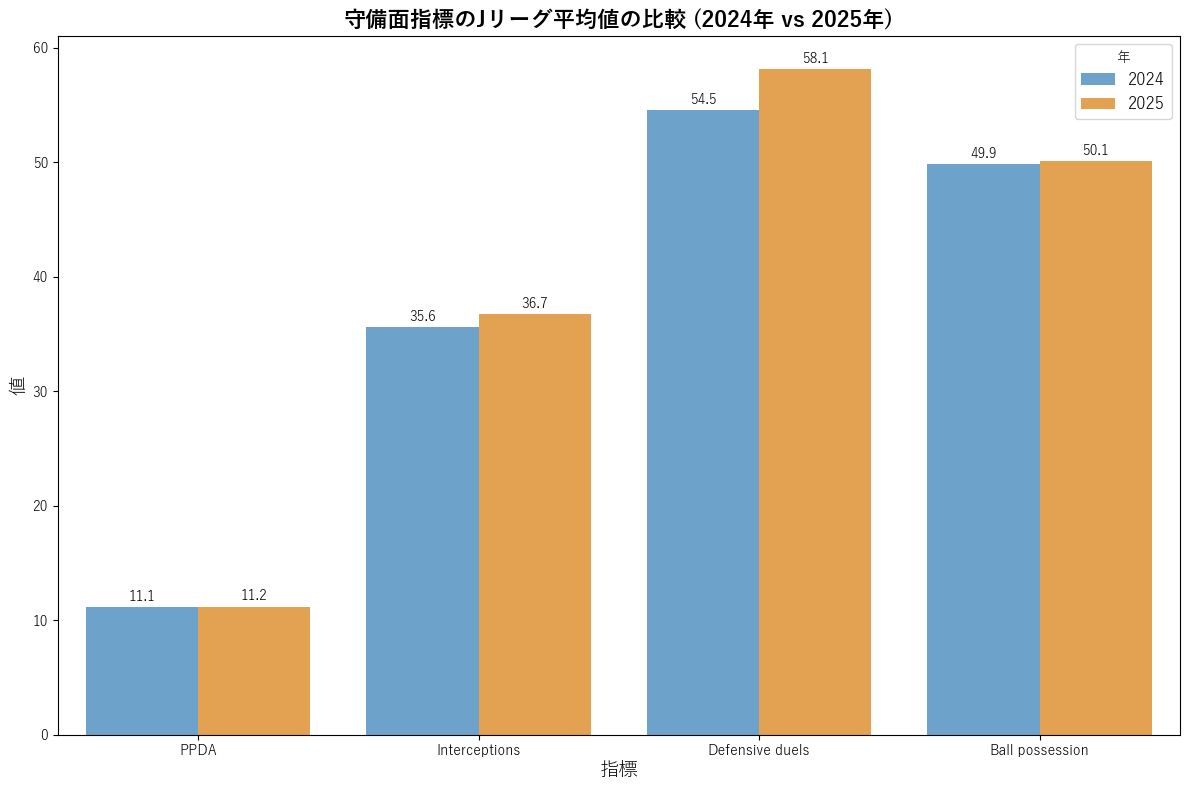

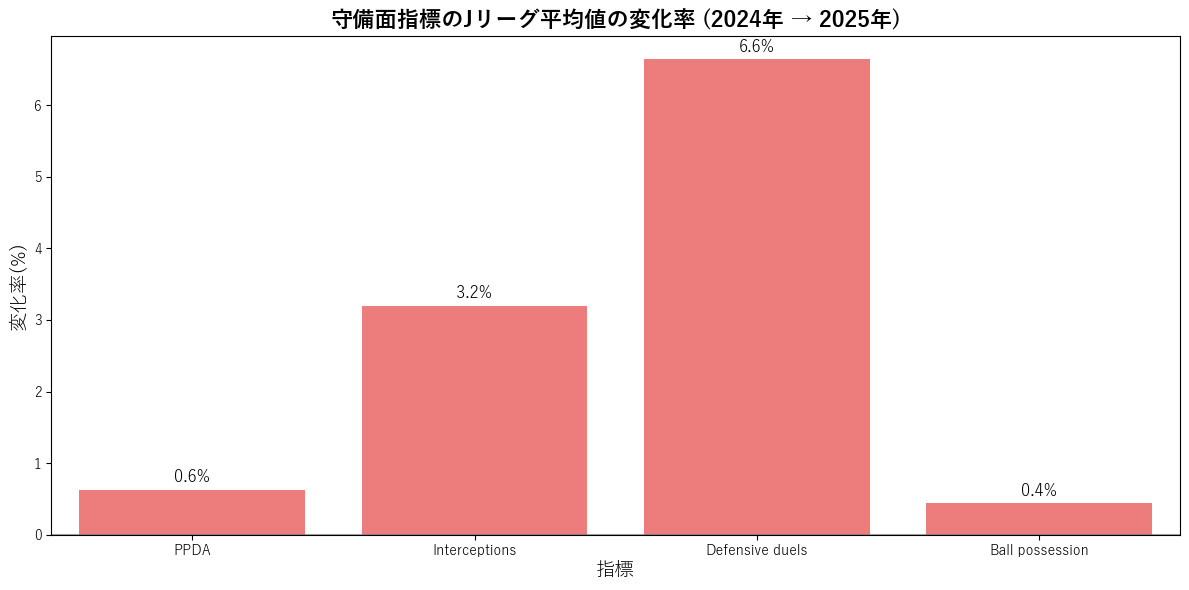

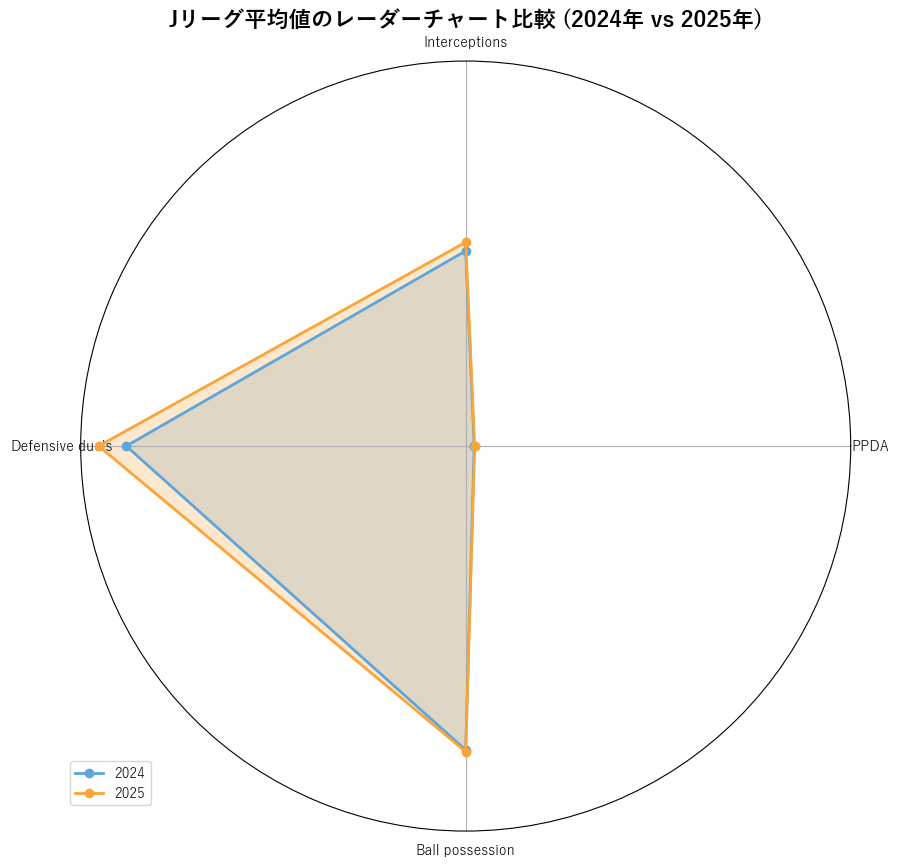

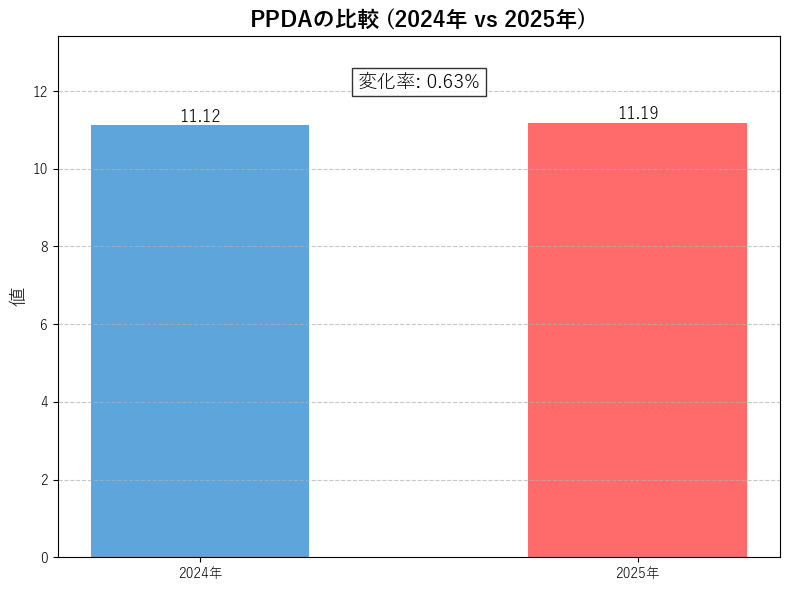

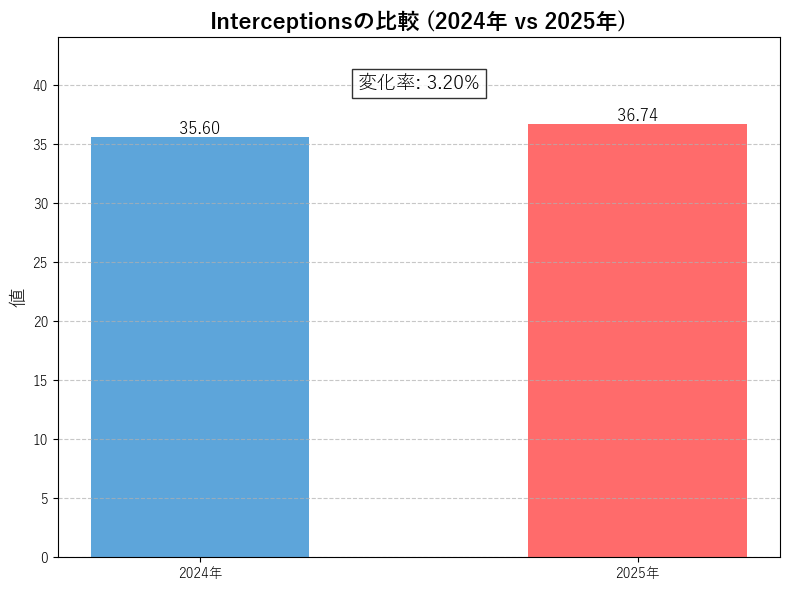

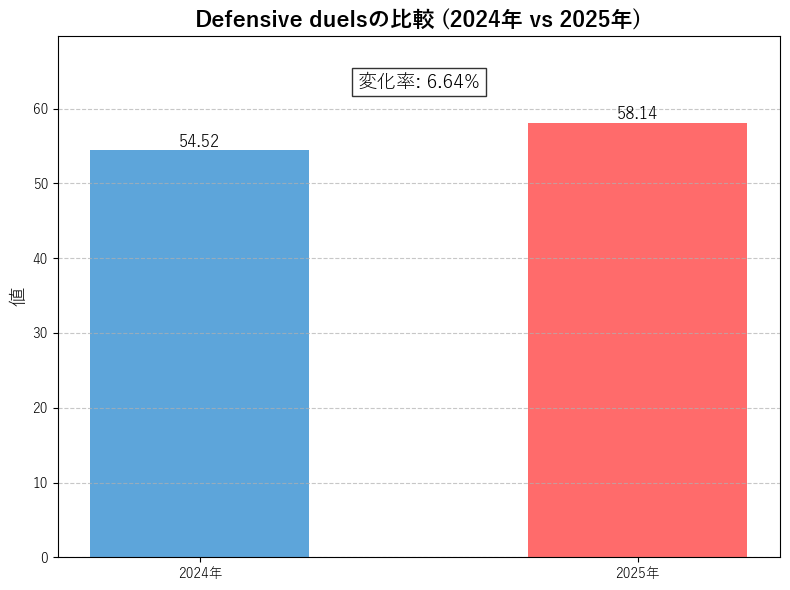

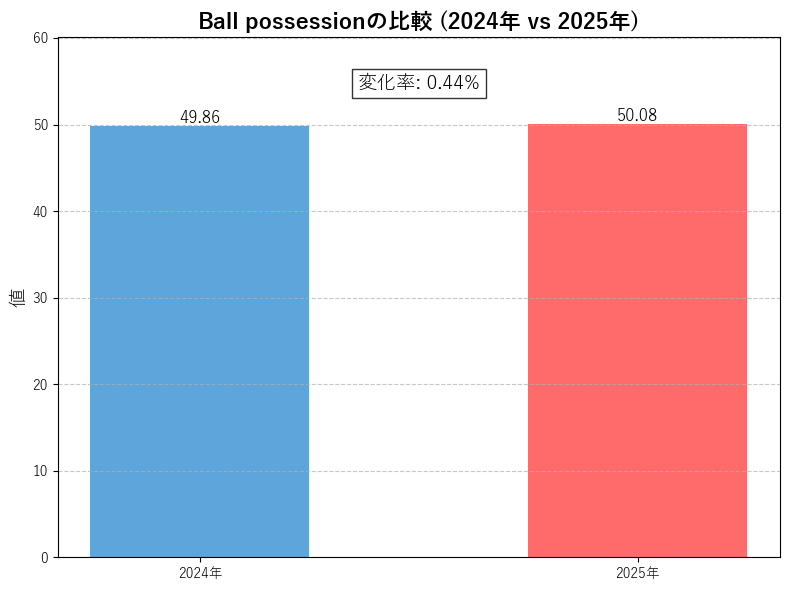

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# # リーグ平均のデータを抽出する関数
# def extract_league_average(dataframes, metrics):
#     result = {}
#     for metric in metrics:
#         if metric in dataframes:
#             df = dataframes[metric]
#             # リーグ平均行を抽出
#             avg_row = df[df["Team"] == "リーグ平均"]
#             if not avg_row.empty:
#                 # Per 90 mins列があればそれを使用、なければ通常の値を使用
#                 if "Per 90 mins" in avg_row.columns:
#                     result[metric] = avg_row["Per 90 mins"].values[0]
#                 else:
#                     result[metric] = avg_row[metric].values[0]
#     return result

# # 比較したい指標のリスト
metrics = ['PPDA', 'Interceptions', 'Defensive duels',  'Ball possession']

# # リーグ平均データを抽出（実際のデータフレームを使用）
# # 以下はダミーデータなので、実際のdataframes_2024とdataframes_2025を使用してください
# # 実際のコードでは以下の部分を変更してください

# league_avg_2024 = extract_league_average(dataframes_2024, metrics)
# league_avg_2025 = extract_league_average(dataframes_2025, metrics)


# ダミーデータ（実際のデータに置き換えてください）
league_avg_2024 = {
    'PPDA': 11.12,
    'Interceptions': 35.6,
    'Defensive duels': 54.52,
    # 'Challenge intensity': 5.69,
    'Ball possession': 49.86
}

league_avg_2025 = {
    'PPDA': 11.19,
    'Interceptions': 36.74,
    'Defensive duels': 58.14,
    # 'Challenge intensity': 5.71,
    'Ball possession': 50.08
}

# 1. 棒グラフでの比較
def plot_league_average_comparison(league_avg_2024, league_avg_2025, metrics):
    # データフレームに変換
    data = []
    for metric in metrics:
        data.append({'指標': metric, '年': '2024', '値': league_avg_2024.get(metric, 0)})
        data.append({'指標': metric, '年': '2025', '値': league_avg_2025.get(metric, 0)})
    
    df = pd.DataFrame(data)
    
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x='指標', y='値', hue='年', data=df, palette=['#5DA5DA', '#FAA43A'])
    
    # 値をバーの上に表示
    for i, container in enumerate(ax.containers):
        ax.bar_label(container, fmt='%.1f', padding=3)
    
    plt.title('守備面指標のJリーグ平均値の比較 (2024年 vs 2025年)', fontsize=16, fontweight='bold')
    plt.xlabel('指標', fontsize=14)
    plt.ylabel('値', fontsize=14)
    plt.legend(title='年', fontsize=12)
    plt.tight_layout()
    
    return plt

# 2. 前年比の変化率を計算して可視化
def plot_change_percentage(league_avg_2024, league_avg_2025, metrics):
    # 変化率を計算
    changes = {}
    for metric in metrics:
        if metric in league_avg_2024 and metric in league_avg_2025:
            changes[metric] = (league_avg_2025[metric] - league_avg_2024[metric]) / league_avg_2024[metric] * 100
    
    # データフレームに変換
    df = pd.DataFrame({'指標': list(changes.keys()), '変化率(%)': list(changes.values())})
    
    # 増加したものは赤、減少したものは青で表示
    colors = ['#FF6B6B' if x > 0 else '#4ECDC4' for x in df['変化率(%)']]
    
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='指標', y='変化率(%)', data=df, palette=colors)
    
    # 値をバーの上に表示
    for i, v in enumerate(df['変化率(%)']):
        ax.text(i, v + (1 if v > 0 else -3) -0.9, f'{v:.1f}%', ha='center', fontsize=12)
    
    # 0の線を追加
    plt.axhline(y=0, color='gray', linestyle='-', alpha=0.7)
    
    plt.title('守備面指標のJリーグ平均値の変化率 (2024年 → 2025年)', fontsize=16, fontweight='bold')
    plt.xlabel('指標', fontsize=14)
    plt.ylabel('変化率(%)', fontsize=14)
    plt.tight_layout()
    
    return plt

# 3. レーダーチャートでの比較
def plot_radar_chart(league_avg_2024, league_avg_2025, metrics):
    # データ正規化のための関数
    def normalize_data(data_dict, metrics):
        # 最大値と最小値を基準に正規化
        all_values = [value for metric in metrics for value in [league_avg_2024.get(metric, 0), league_avg_2025.get(metric, 0)]]
        min_val = min(all_values) * 0.9  # 少し余裕を持たせる
        max_val = max(all_values) * 1.1
        
        normalized = {}
        for metric in metrics:
            if metric in data_dict:
                normalized[metric] = (data_dict[metric] - min_val) / (max_val - min_val)
        return normalized
    
    # データの正規化
    norm_2024 = normalize_data(league_avg_2024, metrics)
    norm_2025 = normalize_data(league_avg_2025, metrics)
    
    # 角度の計算
    angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
    
    # 閉じた図形にするためデータを繰り返す
    values_2024 = [norm_2024.get(metric, 0) for metric in metrics]
    values_2025 = [norm_2025.get(metric, 0) for metric in metrics]
    values_2024.append(values_2024[0])
    values_2025.append(values_2025[0])
    angles.append(angles[0])
    
    # プロット
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
    
    ax.plot(angles, values_2024, 'o-', linewidth=2, label='2024', color='#5DA5DA')
    ax.fill(angles, values_2024, alpha=0.25, color='#5DA5DA')
    
    ax.plot(angles, values_2025, 'o-', linewidth=2, label='2025', color='#FAA43A')
    ax.fill(angles, values_2025, alpha=0.25, color='#FAA43A')
    
    # ラベルの設置
    ax.set_thetagrids(np.degrees(angles[:-1]), metrics)
    
    # 目盛りを非表示
    ax.set_yticks([])
    
    plt.title('Jリーグ平均値のレーダーチャート比較 (2024年 vs 2025年)', fontsize=16, fontweight='bold')
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    
    return plt

# 4. 実際の値を表で表示
def display_values_table(league_avg_2024, league_avg_2025, metrics):
    data = []
    for metric in metrics:
        if metric in league_avg_2024 and metric in league_avg_2025:
            change = (league_avg_2025[metric] - league_avg_2024[metric]) / league_avg_2024[metric] * 100
            data.append({
                '指標': metric,
                '2024年': league_avg_2024[metric],
                '2025年': league_avg_2025[metric],
                '変化率(%)': change
            })
    
    df = pd.DataFrame(data)
    
    # 少数点以下の桁数を指定
    df['2024年'] = df['2024年'].round(2)
    df['2025年'] = df['2025年'].round(2)
    df['変化率(%)'] = df['変化率(%)'].round(2)
    
    # 表示
    return df

# 5. 棒グラフで変化を1つずつ表示（より詳細に）
def plot_individual_metrics(league_avg_2024, league_avg_2025, metrics):
    for metric in metrics:
        if metric in league_avg_2024 and metric in league_avg_2025:
            # データを準備
            years = ['2024年', '2025年']
            values = [league_avg_2024[metric], league_avg_2025[metric]]
            
            # 増加か減少かで色を変える
            colors = ['#5DA5DA', '#FF6B6B'] if values[1] > values[0] else ['#5DA5DA', '#4ECDC4']
            
            # プロット
            plt.figure(figsize=(8, 6))
            bars = plt.bar(years, values, color=colors, width=0.5)
            
            # 値を表示
            for bar in bars:
                height = bar.get_height()
                plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                        f'{height:.2f}', ha='center', va='bottom', fontsize=12)
            
            # 変化率を計算して表示
            change = (values[1] - values[0]) / values[0] * 100
            plt.text(0.5, 0.9, f'変化率: {change:.2f}%', 
                    transform=plt.gca().transAxes, ha='center', 
                    fontsize=14, bbox=dict(facecolor='white', alpha=0.8))
            
            plt.title(f'{metric}の比較 (2024年 vs 2025年)', fontsize=16, fontweight='bold')
            plt.ylabel('値', fontsize=14)
            plt.ylim(0, max(values) * 1.2)  # 少し余裕を持たせる
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.tight_layout()
            
            plt.show()

# 実行
plot_league_average_comparison(league_avg_2024, league_avg_2025, metrics)
plot_change_percentage(league_avg_2024, league_avg_2025, metrics)
plot_radar_chart(league_avg_2024, league_avg_2025, metrics)

# 表を表示
table_df = display_values_table(league_avg_2024, league_avg_2025, metrics)
print(table_df)

# 個別メトリクスの詳細グラフを表示
plot_individual_metrics(league_avg_2024, league_avg_2025, metrics)